## Human Detection Project

#### Imports

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import os
import cv2
from PIL import Image

from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

In [89]:
image_directory = '/kaggle/input/human-detection-data/human_data/'

In [90]:
SIZE = 150
dataset = []
label = []

In [91]:
# for images not containing humans
images_without_humans = os.listdir(image_directory + '0/')
for i, image_name in enumerate(images_without_humans):
    if(image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + '0/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [92]:
# for images containing humans
images_with_humans = os.listdir(image_directory + '1/')
for i, image_name in enumerate(images_with_humans):
    if(image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + '1/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [31]:
label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [93]:
print("Total no. of images: ", len(dataset))
print("Total no. of label: ", len(label))

Total no. of images:  921
Total no. of label:  921


In [94]:
dataset = np.array(dataset)
label = np.array(label)

In [95]:
print("Shape of image dataset: ", dataset.shape)
print("Shape of labels: ", label.shape)

Shape of image dataset:  (921, 150, 150, 3)
Shape of labels:  (921,)


In [96]:
np.unique(label)

array([0, 1])

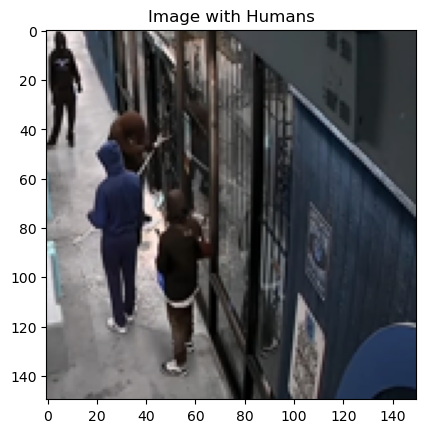

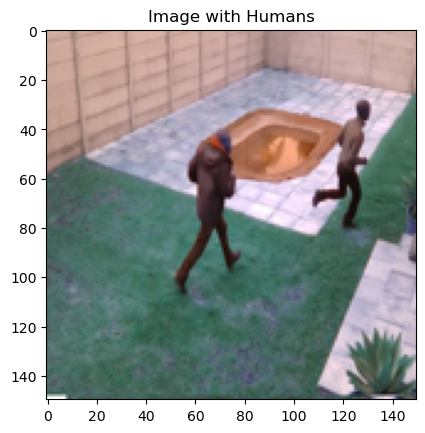

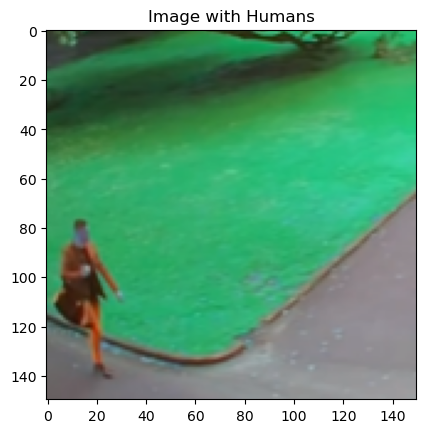

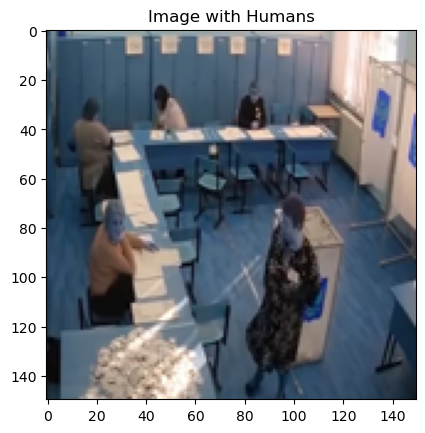

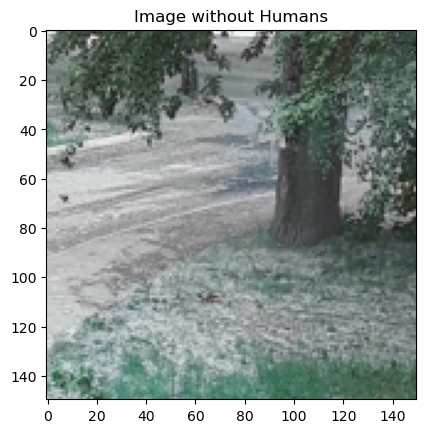

In [97]:
# checking everything is correct till now
import random

# Select random five images
random_indices = random.sample(range(len(dataset)), 5)

# Display images and set titles
for index in random_indices:
    img = np.reshape(dataset[index], (150, 150, 3))
    plt.imshow(img)
    if label[index] == 1:
        plt.title('Image with Humans')
    else:
        plt.title('Image without Humans')
    plt.show()

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

In [99]:
# normalizing
X_train = X_train / 255
X_test = X_test / 255

#### Approach 1: Using CNN

In [100]:
# Model Definition
INPUT_SHAPE = (SIZE, SIZE, 3)

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), input_shape = INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# sigmoid is used for binary classification not softmax

In [101]:
model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_10 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_11 (Activation)  (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [103]:
history = model.fit(X_train, Y_train,
                  batch_size = 64,
                  verbose=1,
                  epochs=20,
                  validation_data=(X_test, Y_test),
                  shuffle=False)

Epoch 1/20
12/12 [==============================] - 3s 58ms/step - loss: 0.7101 - accuracy: 0.5720 - val_loss: 0.6751 - val_accuracy: 0.6324
Epoch 2/20
12/12 [==============================] - 0s 29ms/step - loss: 0.6721 - accuracy: 0.5992 - val_loss: 0.6535 - val_accuracy: 0.6324
Epoch 3/20
12/12 [==============================] - 0s 30ms/step - loss: 0.6630 - accuracy: 0.6005 - val_loss: 0.6415 - val_accuracy: 0.6757
Epoch 4/20
12/12 [==============================] - 0s 29ms/step - loss: 0.6563 - accuracy: 0.6440 - val_loss: 0.6077 - val_accuracy: 0.7135
Epoch 5/20
12/12 [==============================] - 0s 28ms/step - loss: 0.6205 - accuracy: 0.6766 - val_loss: 0.5890 - val_accuracy: 0.7081
Epoch 6/20
12/12 [==============================] - 0s 29ms/step - loss: 0.6197 - accuracy: 0.6644 - val_loss: 0.6009 - val_accuracy: 0.7351
Epoch 7/20
12/12 [==============================] - 0s 28ms/step - loss: 0.6072 - accuracy: 0.6970 - val_loss: 0.5627 - val_accuracy: 0.7243
Epoch 8/20
12

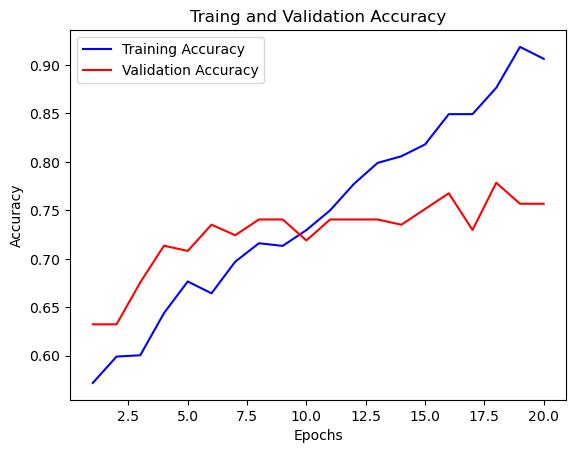

In [104]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title("Traing and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

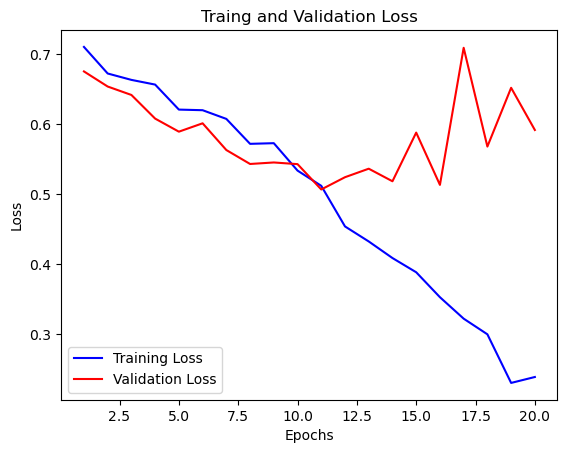

In [105]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title("Traing and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 90ms/step
The prediction for the image is:  [[0.99785197]]
The actual label for the image is:  1


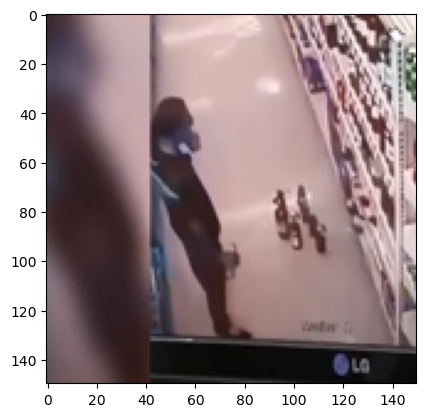

In [106]:
# testing a single image
n = random.randint(0, len(X_test)-1)
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
print("The prediction for the image is: ", model.predict(input_img))
print("The actual label for the image is: ", Y_test[n])

In [107]:
_, acc = model.evaluate(X_test, Y_test)
print("Accuracy: ", (acc*100.0), " %")

6/6 [==============================] - 0s 8ms/step - loss: 0.5914 - accuracy: 0.7568
Accuracy:  75.67567825317383  %


#### Settng up some functions:

In [121]:
# function to plote training history
def plot_history(history):
    # store results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # plot results
    # accuracy
    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')
    
    # loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()

In [110]:

def create_model(base_model):
    
    x = base_model.output    
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation = 'relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(64, activation = 'relu')(x)
    x = Dropout(0.2)(x)
    
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(base_model.inputs, outputs)
    
    return model 

In [118]:
def fit_model(model, base_model, epochs, fine_tune = 0):
    
    early = tf.keras.callbacks.EarlyStopping( patience = 10,
                                              min_delta = 0.001,
                                              restore_best_weights = True)
    
    print("Unfreezing number of layers in base model = ", fine_tune)
    
    if fine_tune > 0:
        base_model.trainable = True
        for layer in base_model.layers[:-fine_tune]:
            layer.trainable = False       
        # small learning rate for fine tuning
        model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
    else:
        base_model.trainable = False
        model.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

    history = model.fit(X_train, Y_train,
                        validation_data = (X_test, Y_test),
                        epochs = 15,
                        callbacks = [early])
    
    return history

#### Approach 2: Using VGG16

In [119]:
# load the VGG19 architecture with imagenet weights as base
vgg16_base_model = tf.keras.applications.vgg16.VGG16(
                             include_top = False,
                             weights = 'imagenet',
                             input_shape = (150, 150, 3)
                             )


vgg16_model = create_model(vgg16_base_model)
vgg16_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [120]:
history = fit_model(vgg16_model, vgg16_base_model, epochs = 15)

Unfreezing number of layers in base model =  0
Epoch 1/15
23/23 [==============================] - 3s 77ms/step - loss: 0.6518 - accuracy: 0.6155 - val_loss: 0.5616 - val_accuracy: 0.8703
Epoch 2/15
23/23 [==============================] - 1s 55ms/step - loss: 0.5541 - accuracy: 0.7228 - val_loss: 0.3929 - val_accuracy: 0.8703
Epoch 3/15
23/23 [==============================] - 1s 51ms/step - loss: 0.4878 - accuracy: 0.7785 - val_loss: 0.3414 - val_accuracy: 0.8757
Epoch 4/15
23/23 [==============================] - 1s 55ms/step - loss: 0.4404 - accuracy: 0.8003 - val_loss: 0.3279 - val_accuracy: 0.8811
Epoch 5/15
23/23 [==============================] - 1s 58ms/step - loss: 0.4006 - accuracy: 0.8288 - val_loss: 0.3268 - val_accuracy: 0.8541
Epoch 6/15
23/23 [==============================] - 1s 57ms/step - loss: 0.3905 - accuracy: 0.8370 - val_loss: 0.3033 - val_accuracy: 0.8811
Epoch 7/15
23/23 [==============================] - 1s 49ms/step - loss: 0.3564 - accuracy: 0.8573 - val_lo

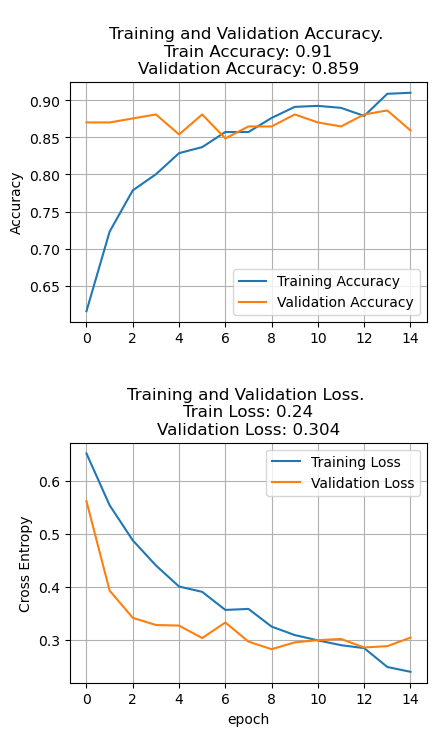

In [122]:
plot_history(history)

In [123]:
_, acc = vgg16_model.evaluate(X_test, Y_test)
print("Accuracy: ", (acc*100.0), " %")

6/6 [==============================] - 0s 41ms/step - loss: 0.3042 - accuracy: 0.8595
Accuracy:  85.94594597816467  %


#### Approach 3: Using Inception

In [124]:
# load the InceptionResNetV2 architecture with imagenet weights as base
inception_base_model = tf.keras.applications.InceptionResNetV2(
                     include_top = False,
                     weights = 'imagenet',
                     input_shape = (150, 150, 3)
                     )

219055592/219055592 [==============================] - 2s 0us/step


In [125]:
inception_model = create_model(inception_base_model)
inception_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 74, 74, 32)   864         ['input_8[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_9[0][0]']               
 alization)                                                                                       
                                                                                            

In [126]:
history = fit_model(inception_model, inception_base_model, epochs = 15)

Unfreezing number of layers in base model =  0
Epoch 1/15
23/23 [==============================] - 54s 2s/step - loss: 0.7009 - accuracy: 0.6739 - val_loss: 0.3903 - val_accuracy: 0.8054
Epoch 2/15
23/23 [==============================] - 2s 108ms/step - loss: 0.4628 - accuracy: 0.8003 - val_loss: 0.3504 - val_accuracy: 0.8432
Epoch 3/15
23/23 [==============================] - 2s 77ms/step - loss: 0.4193 - accuracy: 0.8207 - val_loss: 0.3725 - val_accuracy: 0.8216
Epoch 4/15
23/23 [==============================] - 2s 76ms/step - loss: 0.4113 - accuracy: 0.8111 - val_loss: 0.3550 - val_accuracy: 0.8486
Epoch 5/15
23/23 [==============================] - 2s 95ms/step - loss: 0.3481 - accuracy: 0.8519 - val_loss: 0.3043 - val_accuracy: 0.8486
Epoch 6/15
23/23 [==============================] - 3s 115ms/step - loss: 0.3380 - accuracy: 0.8641 - val_loss: 0.2856 - val_accuracy: 0.8595
Epoch 7/15
23/23 [==============================] - 2s 81ms/step - loss: 0.2986 - accuracy: 0.8682 - val_l

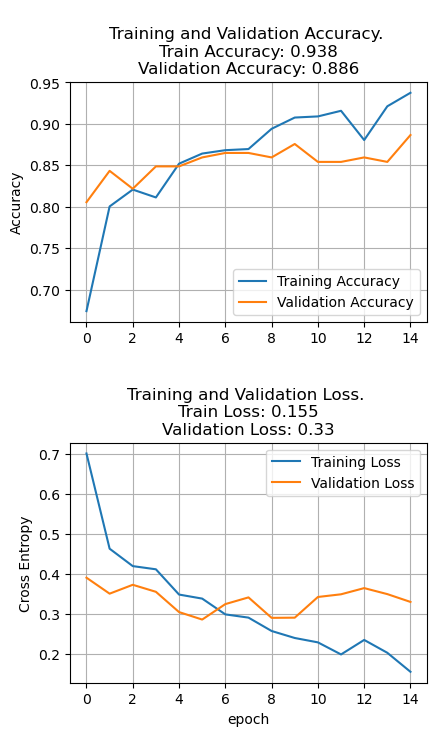

In [127]:
plot_history(history)

In [129]:
_, acc = inception_model.evaluate(X_test, Y_test)
print("Accuracy: ", (acc*100.0), " %")

6/6 [==============================] - 0s 64ms/step - loss: 0.3297 - accuracy: 0.8865
Accuracy:  88.64864706993103  %


#### Approach 4: Using Xception

In [130]:
# load the xception architecture with imagenet weights as base
xception_base_model = tf.keras.applications.xception.Xception(
                                 include_top = False,
                                 weights = 'imagenet',
                                 input_shape = (150, 150, 3)
                                 )

83683744/83683744 [==============================] - 0s 0us/step


In [131]:
xception_model = create_model(xception_base_model)
xception_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_9[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

In [132]:
history = fit_model(xception_model, xception_base_model, epochs = 15)

Unfreezing number of layers in base model =  0
Epoch 1/15
23/23 [==============================] - 7s 134ms/step - loss: 0.6338 - accuracy: 0.6522 - val_loss: 0.4273 - val_accuracy: 0.7892
Epoch 2/15
23/23 [==============================] - 1s 60ms/step - loss: 0.4347 - accuracy: 0.7908 - val_loss: 0.3525 - val_accuracy: 0.8162
Epoch 3/15
23/23 [==============================] - 1s 56ms/step - loss: 0.3572 - accuracy: 0.8546 - val_loss: 0.3142 - val_accuracy: 0.8757
Epoch 4/15
23/23 [==============================] - 1s 59ms/step - loss: 0.3058 - accuracy: 0.8696 - val_loss: 0.3762 - val_accuracy: 0.8378
Epoch 5/15
23/23 [==============================] - 1s 56ms/step - loss: 0.2704 - accuracy: 0.8832 - val_loss: 0.3161 - val_accuracy: 0.8595
Epoch 6/15
23/23 [==============================] - 1s 55ms/step - loss: 0.2096 - accuracy: 0.9253 - val_loss: 0.3166 - val_accuracy: 0.8757
Epoch 7/15
23/23 [==============================] - 1s 52ms/step - loss: 0.1750 - accuracy: 0.9280 - val_l

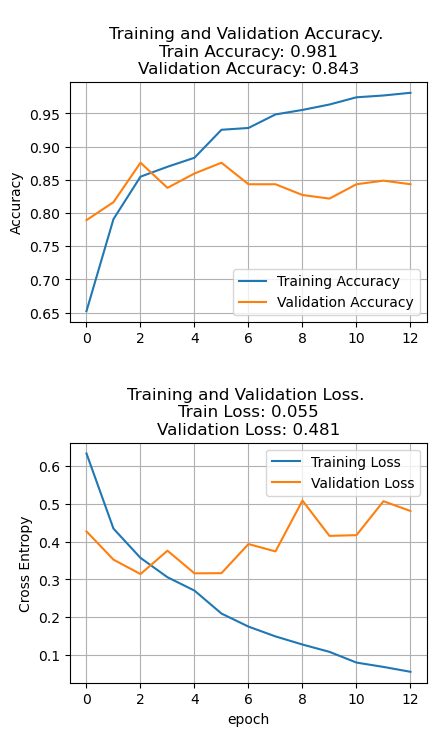

In [133]:
plot_history(history)

In [134]:
_, acc = xception_model.evaluate(X_test, Y_test)
print("Accuracy: ", (acc*100.0), " %")

6/6 [==============================] - 0s 42ms/step - loss: 0.3142 - accuracy: 0.8757
Accuracy:  87.56756782531738  %
